In [122]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import numpy as np
import math

In [123]:
# 1. Load the Dataset
# create_using=nx.DiGraph() ensures it is treated as a Directed Graph
G = nx.read_edgelist("Wiki-Vote.txt", create_using=nx.DiGraph(), nodetype=int)
num_nodes = G.number_of_nodes()


In [124]:
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")

Number of Nodes: 7115
Number of Edges: 103689


In [125]:
# Edge List (First 5 edges)
print("\n--- Edge List (First 5) ---")
print(list(G.edges())[:100])


--- Edge List (First 5) ---
[(30, 1412), (30, 3352), (30, 5254), (30, 5543), (30, 7478), (3352, 72), (3352, 285), (3352, 417), (3352, 465), (3352, 608), (3352, 762), (3352, 825), (3352, 827), (3352, 974), (3352, 1140), (3352, 1166), (3352, 1185), (3352, 1239), (3352, 1247), (3352, 1297), (3352, 1307), (3352, 1310), (3352, 1385), (3352, 1453), (3352, 1549), (3352, 1571), (3352, 1633), (3352, 1680), (3352, 1688), (3352, 1706), (3352, 1729), (3352, 1769), (3352, 1799), (3352, 1990), (3352, 2066), (3352, 2114), (3352, 2134), (3352, 2144), (3352, 2145), (3352, 2240), (3352, 2252), (3352, 2257), (3352, 2289), (3352, 2297), (3352, 2324), (3352, 2326), (3352, 2328), (3352, 2338), (3352, 2354), (3352, 2369), (3352, 2381), (3352, 2384), (3352, 2398), (3352, 2411), (3352, 2433), (3352, 2485), (3352, 2506), (3352, 2510), (3352, 2516), (3352, 2517), (3352, 2535), (3352, 2544), (3352, 2565), (3352, 2576), (3352, 2592), (3352, 2595), (3352, 2619), (3352, 2646), (3352, 2653), (3352, 2654), (3352, 265

In [126]:
# Adjacency List (First 5 nodes)
print("\n--- Adjacency List (First 5 nodes) ---")
for line in nx.generate_adjlist(G):
    print(line)
    if int(line.split()[0]) > 5: 
        break



--- Adjacency List (First 5 nodes) ---
30 1412 3352 5254 5543 7478


In [127]:
# Matrix Representation (Adjacency Matrix)
adj_matrix = nx.to_scipy_sparse_array(G)
print("\n--- Adjacency Matrix Shape ---")
print(adj_matrix.shape)


--- Adjacency Matrix Shape ---
(7115, 7115)


In [128]:
# 2. Get Degree Data
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

In [129]:
# 5. Top 5 Lists
top_5_voted = sorted(
    in_degrees.items(), 
    key=lambda x: x[1], reverse=True)[:5]
least_5_voted = sorted(
    in_degrees.items(),
    key=lambda x: x[1])[:3000]

In [130]:
print("\nTop 5 Most Voted For (In-Degree):")
for node, degree in top_5_voted:
    print(f"User {node}: {degree} votes")


Top 5 Most Voted For (In-Degree):
User 4037: 457 votes
User 15: 361 votes
User 2398: 340 votes
User 2625: 331 votes
User 1297: 309 votes


In [131]:
print("\nTop 5 Least Voted For (In-Degree):")
for node, degree in least_5_voted:
    print(f"User {node}: {degree} votes")


Top 5 Least Voted For (In-Degree):
User 25: 0 votes
User 4: 0 votes
User 5: 0 votes
User 7: 0 votes
User 9: 0 votes
User 11: 0 votes
User 12: 0 votes
User 13: 0 votes
User 14: 0 votes
User 16: 0 votes
User 17: 0 votes
User 18: 0 votes
User 20: 0 votes
User 21: 0 votes
User 22: 0 votes
User 24: 0 votes
User 37: 0 votes
User 40: 0 votes
User 26: 0 votes
User 41: 0 votes
User 42: 0 votes
User 43: 0 votes
User 44: 0 votes
User 45: 0 votes
User 46: 0 votes
User 47: 0 votes
User 48: 0 votes
User 51: 0 votes
User 52: 0 votes
User 53: 0 votes
User 57: 0 votes
User 58: 0 votes
User 59: 0 votes
User 60: 0 votes
User 62: 0 votes
User 27: 0 votes
User 63: 0 votes
User 65: 0 votes
User 66: 0 votes
User 73: 0 votes
User 76: 0 votes
User 78: 0 votes
User 79: 0 votes
User 77: 0 votes
User 81: 0 votes
User 83: 0 votes
User 91: 0 votes
User 67: 0 votes
User 84: 0 votes
User 85: 0 votes
User 71: 0 votes
User 87: 0 votes
User 88: 0 votes
User 90: 0 votes
User 92: 0 votes
User 82: 0 votes
User 99: 0 votes

In [132]:
top_5_active = sorted(
    out_degrees.items(),
    key=lambda x: x[1], reverse=True)[:5]

least_5_active = sorted(
    out_degrees.items(),
    key=lambda x: x[1])[:3000]

In [133]:
print("\nTop 5 Most Active Voters (Out-Degree):")
for node, degree in top_5_active:
    print(f"User {node}: {degree} votes")


Top 5 Most Active Voters (Out-Degree):
User 2565: 893 votes
User 766: 773 votes
User 11: 743 votes
User 457: 732 votes
User 2688: 618 votes


In [134]:
print("\nTop 5 least Active Voters (Out-Degree):")
for node, degree in least_5_active:
    print(f"User {node}: {degree} votes")


Top 5 least Active Voters (Out-Degree):
User 1412: 0 votes
User 7478: 0 votes
User 214: 0 votes
User 271: 0 votes
User 286: 0 votes
User 300: 0 votes
User 581: 0 votes
User 611: 0 votes
User 8283: 0 votes
User 252: 0 votes
User 299: 0 votes
User 322: 0 votes
User 358: 0 votes
User 370: 0 votes
User 373: 0 votes
User 377: 0 votes
User 379: 0 votes
User 422: 0 votes
User 428: 0 votes
User 514: 0 votes
User 739: 0 votes
User 756: 0 votes
User 857: 0 votes
User 864: 0 votes
User 893: 0 votes
User 1131: 0 votes
User 3755: 0 votes
User 8282: 0 votes
User 8284: 0 votes
User 61: 0 votes
User 167: 0 votes
User 183: 0 votes
User 219: 0 votes
User 250: 0 votes
User 274: 0 votes
User 359: 0 votes
User 378: 0 votes
User 390: 0 votes
User 392: 0 votes
User 394: 0 votes
User 396: 0 votes
User 402: 0 votes
User 421: 0 votes
User 431: 0 votes
User 433: 0 votes
User 435: 0 votes
User 538: 0 votes
User 566: 0 votes
User 589: 0 votes
User 609: 0 votes
User 617: 0 votes
User 619: 0 votes
User 656: 0 votes

In [135]:
# 3. Calculate Averages
avg_in = sum(in_degrees.values()) / num_nodes
avg_out = sum(out_degrees.values()) / num_nodes
avg = G.number_of_edges() / G.number_of_nodes()

In [136]:
print(f"Average In-Degree: {avg_in:.4f}")
print(f"Average Out-Degree: {avg_out:.4f}")
print(f"Average: {avg:.4f}")

Average In-Degree: 14.5733
Average Out-Degree: 14.5733
Average: 14.5733


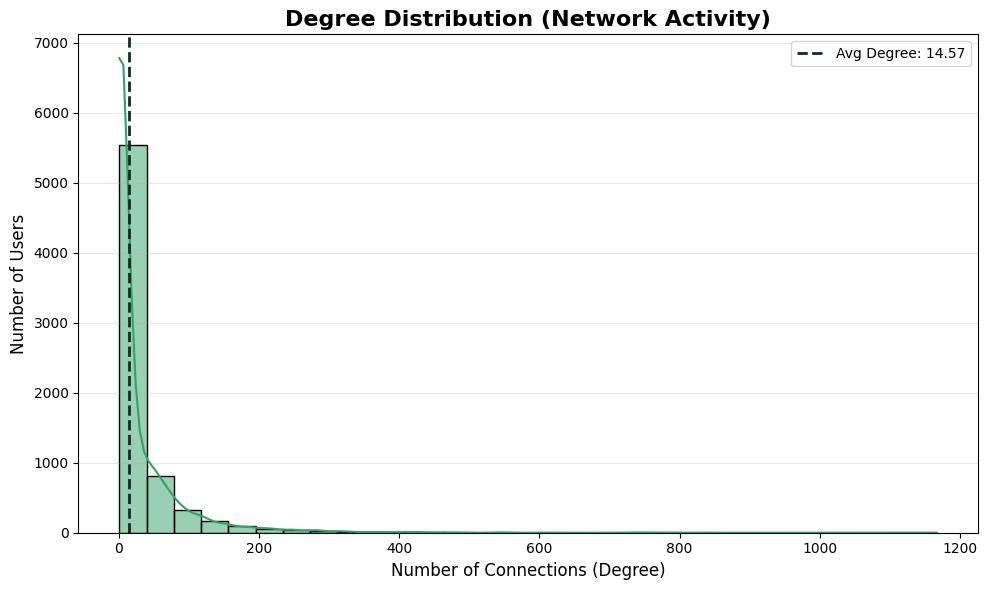

In [137]:
# 3. Visualize Degree Distribution
# Get the degree (number of connections) for every node
degrees = [d for n, d in G.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, bins=30, kde=True, color="#35A167", edgecolor='black')

# Add the Average Line
plt.axvline(avg, color='#16291F', linestyle='--', linewidth=2, label=f'Avg Degree: {avg:.2f}')
plt.title('Degree Distribution (Network Activity)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Connections (Degree)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

In [138]:
# 4. Calculate Max/Min
max_in = max(in_degrees.values())
min_in = min(in_degrees.values())
max_out = max(out_degrees.values())
min_out = min(out_degrees.values())

In [139]:
print(f"Max In-Degree: {max_in} (Node: {max(in_degrees, key=in_degrees.get)})")
print(f"Max Out-Degree: {max_out} (Node: {max(out_degrees, key=out_degrees.get)})")

Max In-Degree: 457 (Node: 4037)
Max Out-Degree: 893 (Node: 2565)


In [140]:
# Check Density (Sparse vs. Dense)
density = nx.density(G)
num_nodes = G.number_of_nodes()
possible_edges = num_nodes * (num_nodes - 1)

print("TOPOLOGY CHECK 1: SPARSITY")
print(f"Actual Connections: {G.number_of_edges()}")
print(f"Possible Connections: {possible_edges}")
print(f"Network Density: {density:.6f} ({density*100:.4f}%)")

TOPOLOGY CHECK 1: SPARSITY
Actual Connections: 103689
Possible Connections: 50616110
Network Density: 0.002049 (0.2049%)


In [141]:
if density < 0.05:
    print(">> CONCLUSION: The network is VERY SPARSE (Typical for Social Networks).")
else:
    print(">> CONCLUSION: The network is DENSE.")

>> CONCLUSION: The network is VERY SPARSE (Typical for Social Networks).


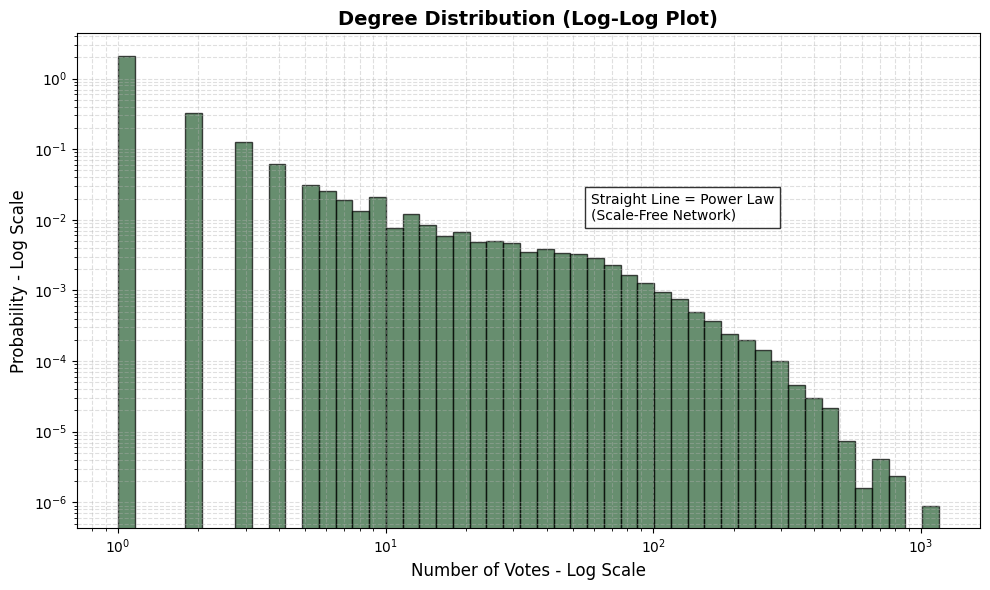

In [142]:
# 3. Check Scale-Free Property (Log-Log Plot)
# Get degrees (in-degree + out-degree for total influence)
degrees = [d for n, d in G.degree()]
degrees = [d for d in degrees if d > 0]
plt.figure(figsize=(10, 6))
log_bins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), 50)
plt.hist(degrees, bins=log_bins, density=True, color="#265e32", alpha=0.7, edgecolor='black')

plt.xscale('log')
plt.yscale('log')

plt.title('Degree Distribution (Log-Log Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Votes - Log Scale', fontsize=12)
plt.ylabel('Probability - Log Scale', fontsize=12)
plt.grid(which="both", linestyle='--', alpha=0.4)

# Add Annotation for the "Power Law"
plt.text(max(degrees)*0.05, 0.01, "Straight Line = Power Law\n(Scale-Free Network)", 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('task3_topology_plot.png')
plt.show()

In [143]:
# 4. Logical Check for Other Types
print("TOPOLOGY CHECK 2: SPECIAL TYPES")
# Check Complete Graph
if density == 1.0:
    print("Type: Complete Graph? YES")
else:
    print("Type: Complete Graph? NO (Density is not 100%)")

TOPOLOGY CHECK 2: SPECIAL TYPES
Type: Complete Graph? NO (Density is not 100%)


In [144]:
# Check Star Graph (One central node connected to everyone)
max_degree = max(degrees)
if max_degree == (num_nodes - 1) and G.number_of_edges() == (num_nodes - 1):
    print("Type: Star Graph? YES")
else:
    print(f"Type: Star Graph? NO (Max degree is {max_degree}, needed {num_nodes-1})")

Type: Star Graph? NO (Max degree is 1167, needed 7114)


In [145]:
print("\n>> FINAL VERDICT: The network is Scale-Free and Sparse.")


>> FINAL VERDICT: The network is Scale-Free and Sparse.


In [146]:
print("TASK 4: CONNECTIVITY ANALYSIS")
# 1. Weak Connectivity (Ignoring Direction)
if nx.is_weakly_connected(G):
    print("Type: Weakly Connected? YES (The whole graph is one piece)")
else:
    print("Type: Weakly Connected? NO ")

TASK 4: CONNECTIVITY ANALYSIS
Type: Weakly Connected? NO 


In [147]:
# Count components
num_wcc = nx.number_weakly_connected_components(G)
# Get size of the biggest one (The Giant Component)
largest_wcc = max(nx.weakly_connected_components(G), key=len)
print(f"- Number of Weak Components: {num_wcc}")
print(f"- Size of Giant Weak Component: {len(largest_wcc)} nodes ({len(largest_wcc)/G.number_of_nodes():.1%})")

- Number of Weak Components: 24
- Size of Giant Weak Component: 7066 nodes (99.3%)


In [148]:
# 2. Strong Connectivity (Respecting Direction)
if nx.is_strongly_connected(G):
    print("\nType: Strongly Connected? YES (You can get from anywhere to anywhere)")
else:
    print("\nType: Strongly Connected? NO (One-way streets trap you)")


Type: Strongly Connected? NO (One-way streets trap you)


In [149]:
num_scc = nx.number_strongly_connected_components(G)
# Get size of the biggest one
largest_scc = max(nx.strongly_connected_components(G), key=len)
print(f"- Number of Strong Components: {num_scc}")
print(f"- Size of Giant Strong Component: {len(largest_scc)} nodes ({len(largest_scc)/G.number_of_nodes():.1%})")

- Number of Strong Components: 5816
- Size of Giant Strong Component: 1300 nodes (18.3%)


In [150]:
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:30]
top_nodes_list = [node for node, degree in top_nodes]

In [151]:
# Create a Sub-Graph of just these 30 people
sub_graph = G.subgraph(top_nodes_list)

In [152]:
# Convert to Adjacency Matrix (Pandas DataFrame)
adj_matrix = nx.to_pandas_adjacency(sub_graph, nodelist=top_nodes_list, dtype=int)

✔ Matrix Visualization saved as 'task5_matrix_heatmap.png'


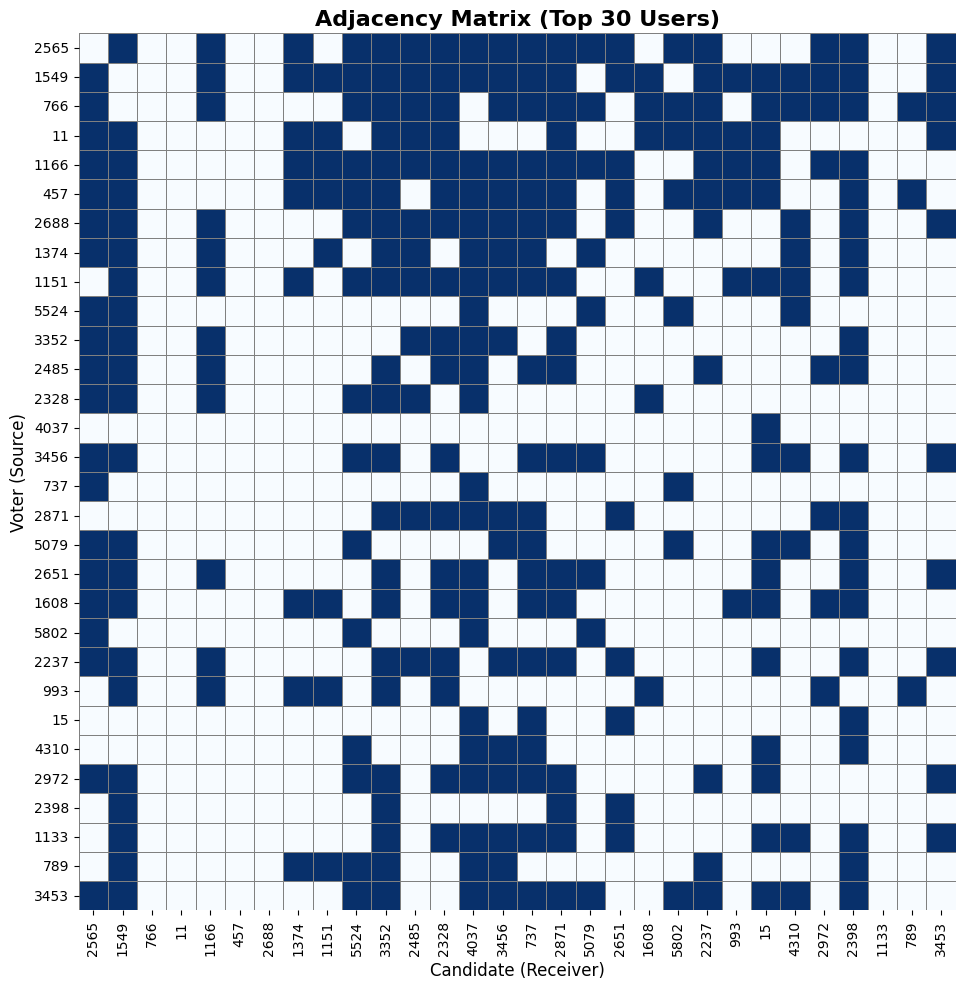

In [153]:
plt.figure(figsize=(12, 10))
sns.heatmap(adj_matrix, cmap="Blues", cbar=False, linewidths=0.5, linecolor='gray', square=True)
plt.title('Adjacency Matrix (Top 30 Users)', fontsize=16, fontweight='bold')
plt.xlabel('Candidate (Receiver)', fontsize=12)
plt.ylabel('Voter (Source)', fontsize=12)

# Save and Show
plt.tight_layout()
plt.savefig('task5_matrix_heatmap.png')
print("✔ Matrix Visualization saved as 'task5_matrix_heatmap.png'")
plt.show()

In [154]:
print(f"Full Matrix Size: {G.number_of_nodes()} x {G.number_of_nodes()}")
print(f"Total Cells: {G.number_of_nodes()**2:,}")
print("Sparsity: The matrix is mostly empty (Zeros).")
print("Sample View: The heatmap above shows interactions within the Top 30 'Elite' group.")

Full Matrix Size: 7115 x 7115
Total Cells: 50,623,225
Sparsity: The matrix is mostly empty (Zeros).
Sample View: The heatmap above shows interactions within the Top 30 'Elite' group.


In [155]:
# 2. Representation A: EDGE LIST
print("REPRESENTATION A: EDGE LIST (The Input)")
print("Format: (Voter, Candidate)")

# Print first 5 edges
for i, edge in enumerate(G.edges()):
    print(f"Edge {i+1}: {edge}")
    if i >= 4: break

REPRESENTATION A: EDGE LIST (The Input)
Format: (Voter, Candidate)
Edge 1: (30, 1412)
Edge 2: (30, 3352)
Edge 3: (30, 5254)
Edge 4: (30, 5543)
Edge 5: (30, 7478)


In [156]:
# 3. Representation B: ADJACENCY LIST
print("REPRESENTATION B: ADJACENCY LIST (Optimized)")
print("Format: User -> [List of people they voted for]")
adj_list = nx.to_dict_of_lists(G)
count = 0
for user, votes in adj_list.items():
    if len(votes) > 0:
        print(f"User {user} : {votes}")
        count += 1
    if count >= 5: break


REPRESENTATION B: ADJACENCY LIST (Optimized)
Format: User -> [List of people they voted for]
User 30 : [1412, 3352, 5254, 5543, 7478]
User 3352 : [72, 285, 417, 465, 608, 762, 825, 827, 974, 1140, 1166, 1185, 1239, 1247, 1297, 1307, 1310, 1385, 1453, 1549, 1571, 1633, 1680, 1688, 1706, 1729, 1769, 1799, 1990, 2066, 2114, 2134, 2144, 2145, 2240, 2252, 2257, 2289, 2297, 2324, 2326, 2328, 2338, 2354, 2369, 2381, 2384, 2398, 2411, 2433, 2485, 2506, 2510, 2516, 2517, 2535, 2544, 2565, 2576, 2592, 2595, 2619, 2646, 2653, 2654, 2655, 2657, 2660, 2667, 2674, 2687, 2689, 2693, 2696, 2727, 2746, 2747, 2760, 2775, 2785, 2787, 2790, 2819, 2822, 2859, 2871, 2900, 2909, 2932, 2958, 2973, 2981, 3005, 3007, 3009, 3014, 3024, 3026, 3027, 3028, 3059, 3084, 3089, 3092, 3103, 3106, 3114, 3117, 3125, 3140, 3144, 3173, 3180, 3192, 3258, 3260, 3276, 3291, 3309, 3313, 3346, 3394, 3404, 3408, 3417, 3435, 3443, 3447, 3452, 3454, 3455, 3456, 3464, 3483, 3516, 3529, 3537, 3557, 3562, 3567, 3568, 3607, 3615, 3631,

In [157]:
# Transitivity: The overall probability that 'a friend of a friend is a friend'
# It measures the density of triangles in the network.
transitivity = nx.transitivity(G)
print(f"1. Global Clustering (Transitivity): {transitivity:.4f}")

1. Global Clustering (Transitivity): 0.0529


In [158]:
avg_clustering = nx.average_clustering(G)
if avg_clustering > 0.1:
    print("   -> Insight: The network has significant 'community structure' (cliques).")
else:
    print("   -> Insight: The network is loose; users connect to stars, not each other.")

   -> Insight: The network is loose; users connect to stars, not each other.


In [159]:
# What % of edges are bidirectional? (A->B and B->A)
reciprocity = nx.reciprocity(G)
print(f"3. Reciprocity: {reciprocity:.4f} ({reciprocity*100:.2f}%)")

if reciprocity < 0.1:
    print("   -> Insight: Hierarchy. Voting is mostly one-way (Users -> Admins).")
else:
    print("   -> Insight: Peer-to-Peer. Users mutually support each other.")


3. Reciprocity: 0.0565 (5.65%)
   -> Insight: Hierarchy. Voting is mostly one-way (Users -> Admins).


In [160]:
# Use Largest Weakly Connected Component.
largest_cc_nodes = max(nx.weakly_connected_components(G), key=len)
subgraph = G.subgraph(largest_cc_nodes).copy()
U = subgraph.to_undirected()

In [161]:
# Average Path Length
avg_path = nx.average_shortest_path_length(U)
print(f"Average Path Length: {avg_path:.4f} steps")
    
# Diameter
diameter = nx.diameter(U)
print(f"Network Diameter: {diameter} steps")

Average Path Length: 3.2475 steps
Network Diameter: 7 steps


In [162]:
# Check "Small World"
log_n = math.log(U.number_of_nodes())
print(f"\n[Check] Log(N) ≈ {log_n:.2f}")
if avg_path <= log_n:
    print(">> VERDICT: YES, it is a 'Small World' Network.")
else:
    print(">> VERDICT: NO, it is a 'Large World' Network.")




[Check] Log(N) ≈ 8.86
>> VERDICT: YES, it is a 'Small World' Network.


In [163]:
# B. Betweenness Centrality (Bridges)
betweenness = nx.betweenness_centrality(G, k=None) 
top_between = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

print("--- TOP 5 BY BETWEENNESS (Gatekeepers) ---")
for user, score in top_between:
    print(f"User {user}: {score:.4f}")

--- TOP 5 BY BETWEENNESS (Gatekeepers) ---
User 2565: 0.0177
User 1549: 0.0166
User 15: 0.0116
User 72: 0.0080
User 737: 0.0061


In [164]:
# C. Closeness Centrality (Speed)
closeness = nx.closeness_centrality(G)
top_close = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]

print("--- TOP 5 BY CLOSENESS (Broadcasters) ---")
for user, score in top_close:
    print(f"User {user}: {score:.4f}")

--- TOP 5 BY CLOSENESS (Broadcasters) ---
User 4037: 0.2965
User 15: 0.2915
User 2398: 0.2909
User 1549: 0.2819
User 2535: 0.2799


In [165]:
# Calculate PageRank (alpha=0.85 is standard)
pagerank_scores = nx.pagerank(G, alpha=0.85)
top_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n--- TOP 5 BY PAGERANK (Authority) ---")
for user, score in top_pagerank:
    print(f"User {user}: {score:.4f}")


--- TOP 5 BY PAGERANK (Authority) ---
User 4037: 0.0046
User 15: 0.0037
User 6634: 0.0035
User 2625: 0.0033
User 2398: 0.0026


In [166]:
# Check if the #1 PageRank user is different from #1 Degree user
top_degree_user = top_5_voted[0][0] 
top_pr_user = top_pagerank[0][0]
if top_degree_user != top_pr_user:
    print(f"Interesting! User {top_pr_user} has the highest PageRank but not the most votes.")
else:
    print("Consolidated Power: The most popular user is also the most authoritative.")

Consolidated Power: The most popular user is also the most authoritative.


Generating Graph 1: The Power Structure...


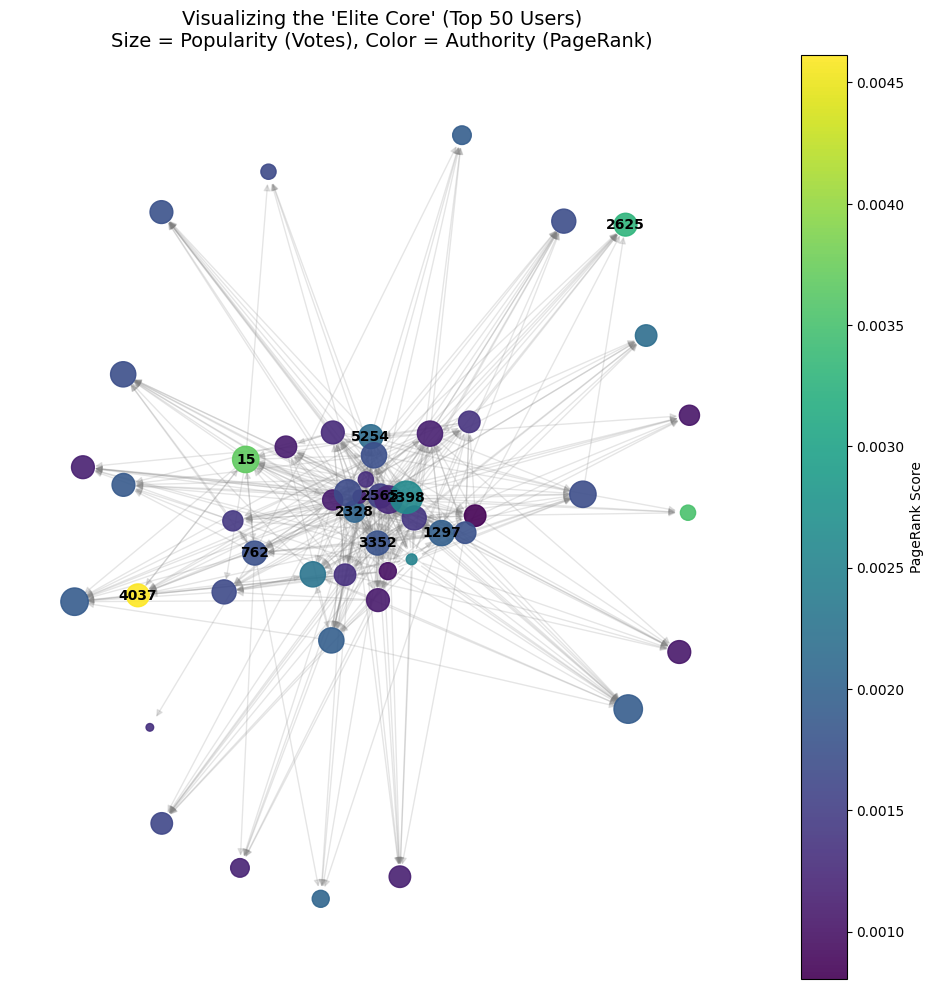

In [167]:
# GRAPH 1: THE POWER STRUCTURE (Top 50)
print("Generating Graph 1: The Power Structure...")
plt.figure(figsize=(12, 12))

# 1. Filter: Get Top 50 nodes by In-Degree
top_50_nodes = sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:50]
top_50_list = [n for n, d in top_50_nodes]
subgraph_50 = G.subgraph(top_50_list)

# 2. Layout: Spring layout (force-directed)
pos = nx.spring_layout(subgraph_50, k=0.5, seed=42)

# 3. Sizes: Based on In-Degree (Votes Received)
# Multiply by a factor (e.g., *20) to make difference visible
node_sizes = [v * 30 for k, v in subgraph_50.in_degree()]

# 4. Colors: Based on PageRank (Authority)
pagerank = nx.pagerank(G)
node_colors = [pagerank[n] for n in subgraph_50.nodes()]

# 5. Draw
# Edges
nx.draw_networkx_edges(subgraph_50, pos, alpha=0.2, edge_color='gray', arrows=True)
# Nodes
nodes = nx.draw_networkx_nodes(subgraph_50, pos, node_size=node_sizes, 
                               node_color=node_colors, cmap=plt.cm.viridis, alpha=0.9)
# Labels (Only for the very top 10 to avoid clutter)
top_10_list = [n for n, d in top_50_nodes[:10]]
labels = {n: n for n in subgraph_50.nodes() if n in top_10_list}
nx.draw_networkx_labels(subgraph_50, pos, labels, font_size=10, font_weight='bold', font_color='black')

plt.title("Visualizing the 'Elite Core' (Top 50 Users)\nSize = Popularity (Votes), Color = Authority (PageRank)", fontsize=14)
plt.colorbar(nodes, label="PageRank Score")
plt.axis('off')
plt.savefig('graph_power_structure.png')
plt.show()

Generating Graph 2: Community Detection...
Using Louvain method.


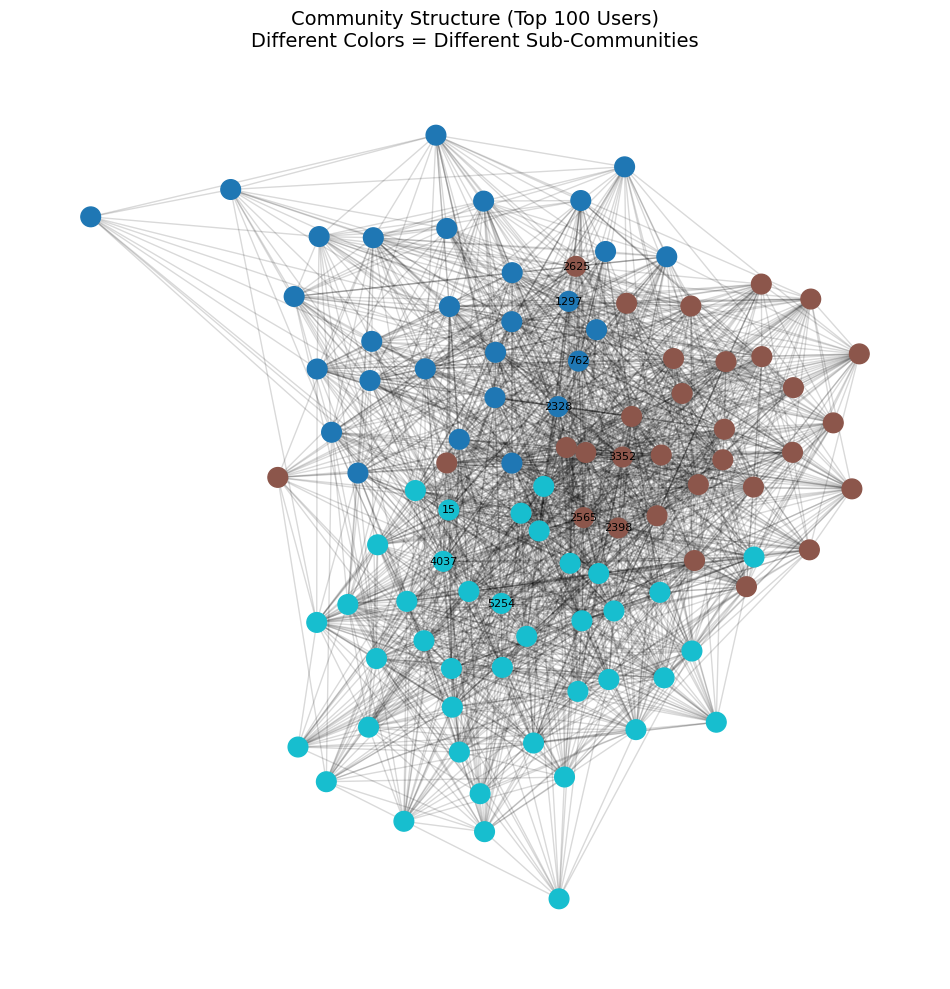

In [ ]:
#GRAPH 2: THE COMMUNITIES (Top 100)
# ==========================================
print("Generating Graph 2: Community Detection...")
plt.figure(figsize=(12, 12))

# 1. Filter: Top 100 for a broader view
top_100_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:100]
top_100_list = [n for n, d in top_100_nodes]
subgraph_100 = G.subgraph(top_100_list).to_undirected() 

# 2. Detect Communities
# Try using Louvain (best), otherwise fallback to Greedy
try:
    import community.community_louvain as community_louvain
    partition = community_louvain.best_partition(subgraph_100)
    print("Using Louvain method.")
except ImportError:
    print("python-louvain not found. Using Greedy Modularity.")
    from networkx.algorithms.community import greedy_modularity_communities
    communities = greedy_modularity_communities(subgraph_100)
    partition = {}
    for i, comm in enumerate(communities):
        for node in comm:
            partition[node] = i

# Map partition to colors
colors = [partition[n] for n in subgraph_100.nodes()]

# 3. Draw
pos = nx.spring_layout(subgraph_100, k=0.3, seed=42)
nx.draw_networkx_edges(subgraph_100, pos, alpha=0.15)
nx.draw_networkx_nodes(subgraph_100, pos, node_size=200, node_color=colors, cmap=plt.cm.tab10)
# Label just the top few hubs
nx.draw_networkx_labels(subgraph_100, pos, labels, font_size=8)

plt.title("Community Structure (Top 100 Users)\nDifferent Colors = Different Sub-Communities", fontsize=14)
plt.axis('off')
plt.savefig('graph_communities.png')
plt.show()